## Birthday Paradox
The birthday paradox is a probability puzzle that demonstrates how quickly the likelihood of a shared birthday increases in a group of people. It's counterintuitive, as it suggests that in a group of just 23 people, there's a greater than **50% chance** that two individuals share the same birthday. (intuitively we would say that for 50% chance we would need $365/2 = 182$ people in that room).

## Math Solution

$$ A - \text{probability that two people share a birthday} $$
$$ \bar{A} - \text{probability that no people share a birthday} $$
$$ r - \text{number of people in the room}  $$
<br> 

Every person's birthday is independent, so that means 365 options for the first, 365 options for the second, and so on:
$$ 365^r - \text{birthday possibilities in total} $$
<br> 

We want no duplications of birthdays. So, the first person has 365 days to choose from, the second - 364, and so on. 
The $r$ -th person has $ (365-r+1) $ days to choose from.

So, the probability that **no people** share the same birthday is the fraction of **all non-shared birthdays** to **all possible birthdays**:
$$ p(\bar{A})=\frac{365.364.363.\cdots.(365 - r + 1)}{365^r} $$

We're interested in $A$, not $\bar{A}$ and we know that these are complementary, so their probabilities add up to 1
$$p(A) = 1 - p(\bar{A})$$

## Implementation
Now. let's write a function which plots the probability of $r$ people sharing a birthday.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

r=2, p=0.0027
r=3, p=0.0082
r=4, p=0.0164
r=5, p=0.0271
r=6, p=0.0405
r=7, p=0.0562
r=8, p=0.0743
r=9, p=0.0946
r=10, p=0.1169
r=11, p=0.1411
r=12, p=0.167
r=13, p=0.1944
r=14, p=0.2231
r=15, p=0.2529
r=16, p=0.2836
r=17, p=0.315
r=18, p=0.3469
r=19, p=0.3791
r=20, p=0.4114
r=21, p=0.4437
r=22, p=0.4757
r=23, p=0.5073
r=24, p=0.5383
r=25, p=0.5687
r=26, p=0.5982
r=27, p=0.6269
r=28, p=0.6545
r=29, p=0.681
r=30, p=0.7063
r=31, p=0.7305
r=32, p=0.7533
r=33, p=0.775
r=34, p=0.7953
r=35, p=0.8144
r=36, p=0.8322
r=37, p=0.8487
r=38, p=0.8641
r=39, p=0.8782
r=40, p=0.8912
r=41, p=0.9032
r=42, p=0.914
r=43, p=0.9239
r=44, p=0.9329
r=45, p=0.941
r=46, p=0.9483
r=47, p=0.9548
r=48, p=0.9606
r=49, p=0.9658
r=50, p=0.9704
r=51, p=0.9744
r=52, p=0.978
r=53, p=0.9811
r=54, p=0.9839
r=55, p=0.9863
r=56, p=0.9883
r=57, p=0.9901
r=58, p=0.9917
r=59, p=0.993
r=60, p=0.9941
r=61, p=0.9951
r=62, p=0.9959
r=63, p=0.9966
r=64, p=0.9972
r=65, p=0.9977
r=66, p=0.9981
r=67, p=0.9984
r=68, p=0.9987
r=69, p=0.9

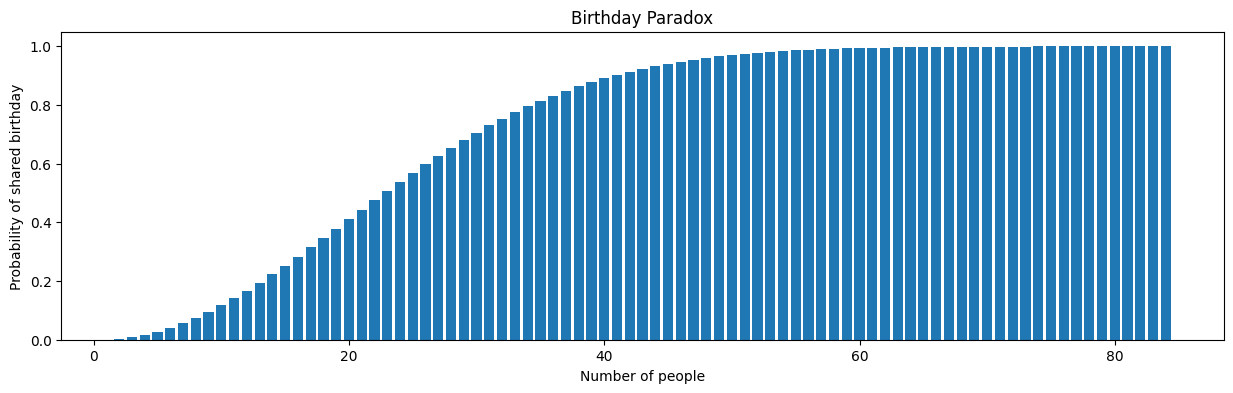

In [2]:
def calculate_birthday_probability(r: int) -> float:
    """
    Returns the probability of r people sharing the same birthday. A year is
    supposed to have 365 days
    """
    # CASE 1: Calculate everythins step-by-step for best clarity.
    if r < 5:
        # Calculate the combinations of 365 dates (without repetitions)
        non_shared = 1
        for i in range(r):
            non_shared *= (365-i)
            
        # Calculate the combinations of 365 dates (incl. repetitions)
        all_possible = 365 ** r

        # The probability the NO people share a birthday (no repetition).
        prob_no_dups: float = (non_shared / all_possible)
    # CASE 2: If `r` is too big, in order to prevent numeric overflow we need to calculate all in one-line.
    else:
        prob_no_dups = 1
        for i in range(r):
            prob_no_dups *= (365-i)/365

    # Return the inverted probability (at least one repetition)
    return 1 - prob_no_dups

X = np.arange(2, 85)
probabilities = [calculate_birthday_probability(r) for r in X]

# Print the exact probabilities
for i in range(len(X)):
    print(f"r={X[i]}, p={round(probabilities[i], 4)}")

# Plot the probability distribution
plt.figure(figsize=(15,4))
plt.bar(X, probabilities)
plt.xlabel("Number of people")
plt.ylabel("Probability of shared birthday")
plt.title("Birthday Paradox")
plt.show()

Around 23 people we observe $p(A) > 0,5$.

Why so few? We're comparing everyone's birthday against everyone else's. We should NOT count the **number of people**, but the **number of comparisons**. In a room of 23 people, there are 252 total comparisons.

In general, we could get a **50% chance** of a match using $\sqrt{n}$ people in $n$ days.